In [1]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as stats

In [2]:
top200weekly = pd.read_csv("alltopwithfeatures.csv")

In [3]:
playlists = pd.read_csv("allplaylist.csv")

In [4]:
dftop = top200weekly


In [5]:
dftop = dftop.set_index("fechas")
semanas = dftop.index
semanas = [i.split("--") for i in semanas]
dftop["weeks"] = [i[0] for i in semanas]
dftop["weeks"] = pd.to_datetime(dftop["weeks"])
dftop = dftop.set_index("weeks")

In [6]:
dftop = dftop.groupby("weeks").mean()

In [7]:
dftop

,popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
weeks,,,,,,,,,,,,,,
2016-12-30,42.775,224075.315,0.676205,0.663160,5.025,-6.004630,0.565,0.119736,0.178528,0.007744,0.163153,0.505095,119.488045,4.015
2017-01-06,42.120,224966.590,0.676690,0.651549,5.025,-6.104685,0.570,0.120731,0.193208,0.007167,0.166108,0.492490,118.907445,4.015
2017-01-13,40.150,222369.245,0.678430,0.659184,5.045,-6.001335,0.580,0.117302,0.187971,0.011794,0.159308,0.490165,121.027190,4.010
2017-01-20,41.030,223224.110,0.675095,0.648564,5.020,-6.083500,0.595,0.116811,0.201438,0.009043,0.160494,0.481990,120.909295,4.010
2017-01-27,40.990,223770.935,0.682055,0.651479,5.010,-6.014540,0.595,0.118323,0.194101,0.007868,0.161858,0.485645,120.829000,4.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01,83.540,198804.725,0.695670,0.625670,5.635,-6.123535,0.500,0.112163,0.260883,0.006104,0.172459,0.547268,120.540200,3.980
2021-01-08,83.805,198184.340,0.692295,0.618990,5.590,-6.169955,0.530,0.111520,0.274262,0.006402,0.167649,0.531063,120.914225,3.965
2021-01-15,83.875,197258.080,0.696510,0.615675,5.525,-6.220715,0.510,0.114074,0.263582,0.007325,0.166143,0.532002,122.190095,3.965


In [8]:
dftop["duration"] = dftop["duration"]/1000000
dftop["popularity"] = dftop["popularity"]/100
dftop["tempo"] = dftop["tempo"]/100
dftop["loudness"] = dftop["loudness"]/10*(-1)
dftop=dftop.drop("key", axis=1)
dftop["time_signature"] = dftop["time_signature"]/10
dftop=dftop.drop("mode", axis=1)

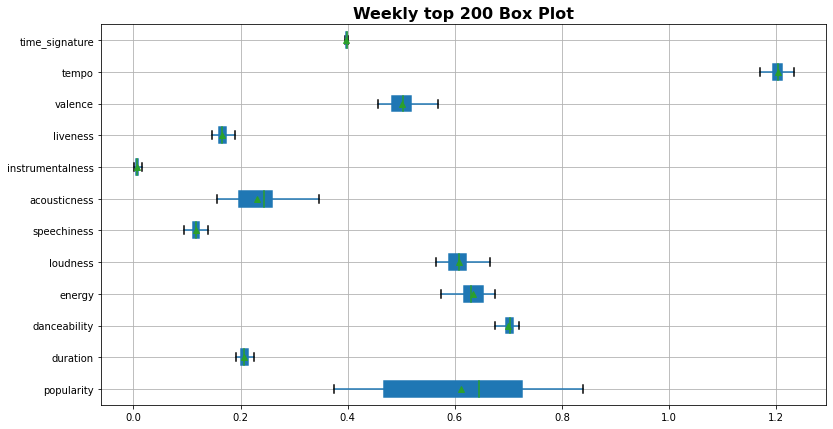

In [9]:
dftop.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Weekly top 200 Box Plot", fontsize=16, fontweight='heavy')
plt.show()

In [10]:
dfcat = playlists
dfcat

,id,name,popularity,duration,artist,album,release_date,playlist,playlist_id,playlist_category,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SFXOMJJ334Wn2PwBHeRZN,Girls Like Us,76,189000,Zoe Wees,Girls Like Us,2021-01-12,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,1,-4.955,1,0.0476,0.28800,0.000000,0.059,0.171,125.706,5
1,5YaskwnGDZFDRipaqzbwQx,Your Love (9PM),80,150052,ATB,Your Love (9PM),2021-01-15,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,7,-5.603,1,0.1120,0.19400,0.000006,0.115,0.517,125.993,4
2,5ri4zqtWhG07hIuNNDWP76,Fly Away,82,178156,Tones And I,Fly Away,2020-11-13,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,4,-6.208,1,0.0685,0.21700,0.000000,0.217,0.503,124.988,4
3,46lyJh9GYmWsHez3EsvmAx,Rise Up (feat. Vamero),76,182000,VINAI,Rise Up (feat. Vamero),2020-05-01,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,1,-3.633,1,0.0488,0.01100,0.000000,0.162,0.359,126.037,4
4,4hSJUp6k7QeHLxU32MrLIU,Ohne Dich,83,125720,KASIMIR1441,Ohne Dich,2021-01-14,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,11,-6.519,0,0.3490,0.19100,0.000000,0.125,0.925,156.013,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69362,0JQPxSYL6alc9UvsPvBoFA,Light,45,209510,Wanna One,1÷x=1 (UNDIVIDED),2018-06-04,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,1,-2.522,0,0.1190,0.21400,0.000000,0.216,0.726,139.932,4
69363,64GiTdVXuZRKTb7fNJXXGc,BABY BABY,0,246253,WINNER,EXIT : E,2016-02-01,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,0,-6.179,1,0.0403,0.04900,0.000000,0.337,0.309,179.914,3
69364,7gr57cYekMWriyJYbT7oZ4,HANN (Alone),62,205820,(G)I-DLE,HANN (Alone),2018-08-14,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,6,-3.315,0,0.0312,0.05900,0.000000,0.167,0.240,104.971,4
69365,2ni9U5vu15LUg93jpQ2hNM,Why So Lonely,0,206706,Wonder Girls,Why So Lonely,2016-07-22,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,7,-5.086,1,0.1330,0.11100,0.000000,0.111,0.809,155.161,4


In [11]:
dfcat = dfcat.groupby("playlist_category").mean()

In [24]:
dfcat.corr()

,popularity,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.489780,0.076417,0.015792,-0.005753,0.192073,-0.156987,-0.007042,-0.046813,-0.190910,-0.022698,0.025970
duration,-0.489780,1.000000,-0.065923,0.093056,-0.041626,-0.143917,-0.012589,-0.014380,0.089551,0.071914,0.035743,0.036559
danceability,0.076417,-0.065923,1.000000,0.634276,-0.789727,0.554292,-0.614114,-0.745948,0.220826,0.842364,0.585642,0.847137
energy,0.015792,0.093056,0.634276,1.000000,-0.920547,0.381282,-0.971770,-0.788542,0.666786,0.659904,0.882814,0.875356
loudness,-0.005753,-0.041626,-0.789727,-0.920547,1.000000,-0.368777,0.872049,0.900490,-0.480317,-0.751675,-0.891522,-0.946292
speechiness,0.192073,-0.143917,0.554292,0.381282,-0.368777,1.000000,-0.450388,-0.339371,0.322020,0.343796,0.166861,0.388436
acousticness,-0.156987,-0.012589,-0.614114,-0.971770,0.872049,-0.450388,1.000000,0.746220,-0.643085,-0.597597,-0.839665,-0.847505
instrumentalness,-0.007042,-0.014380,-0.745948,-0.788542,0.900490,-0.339371,0.746220,1.000000,-0.449569,-0.796937,-0.768255,-0.832519
liveness,-0.046813,0.089551,0.220826,0.666786,-0.480317,0.322020,-0.643085,-0.449569,1.000000,0.274596,0.456174,0.369926
valence,-0.190910,0.071914,0.842364,0.659904,-0.751675,0.343796,-0.597597,-0.796937,0.274596,1.000000,0.607125,0.793622


In [13]:
dfcat["duration"] = dfcat["duration"]/1000000
dfcat["popularity"] = dfcat["popularity"]/100
dfcat["tempo"] = dfcat["tempo"]/100
dfcat["loudness"] = dfcat["loudness"]/10*(-1)
dfcat=dfcat.drop("key", axis=1)
dfcat["time_signature"] = dfcat["time_signature"]/10
dfcat=dfcat.drop("mode", axis=1)

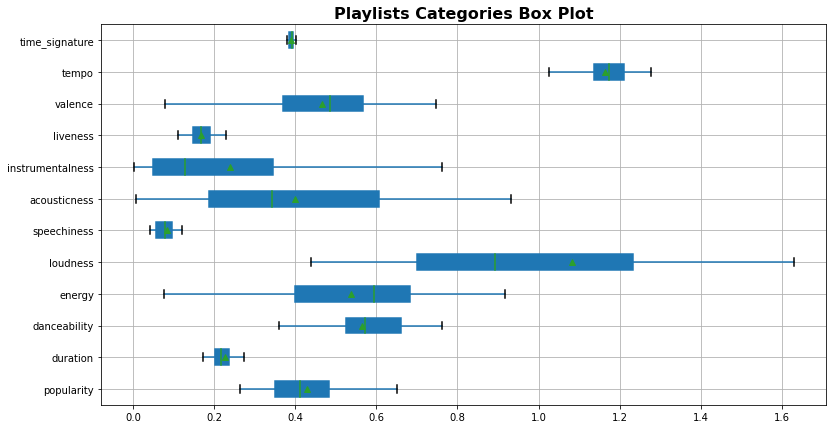

In [14]:
dfcat.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Playlists Categories Box Plot", fontsize=16, fontweight='heavy')
plt.show()

In [15]:
categories = dfcat.index

In [16]:
for i in categories:
    print(i)

afro
arab
at_home
blues
caribbean
chill
classical
country
decades
desi
dinner
edm_dance
family
focus
funk
gaming
hiphop
indie_alt
instrumental
jazz
kpop
latin
metal
mood
party
pop
punk
rnb
rock
romance
roots
sleep
soul
toplists
travel
wellness
workout


In [17]:
listas= playlists

In [18]:
listas["duration"] = listas["duration"]/1000000
listas["popularity"] = listas["popularity"]/100
listas["tempo"] = listas["tempo"]/100
listas["loudness"] = listas["loudness"]/10*(-1)
listas=listas.drop("key", axis=1)
listas["time_signature"] = listas["time_signature"]/10
listas=listas.drop("mode", axis=1)

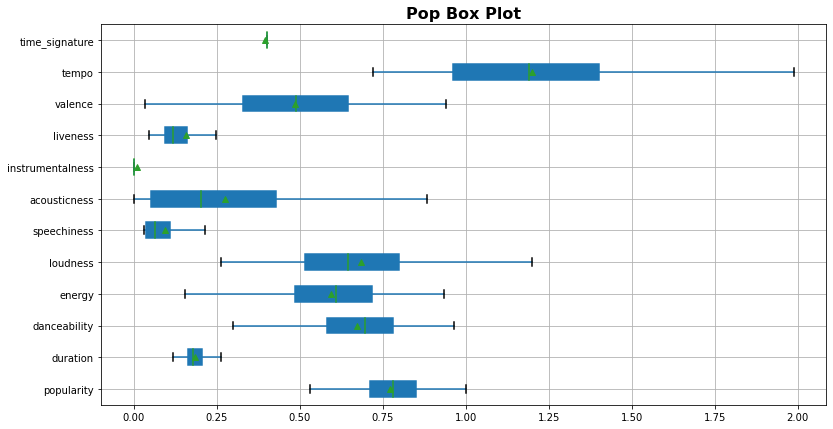

In [19]:
listas.loc[listas["playlist_category"]=="pop"].boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Pop Box Plot", fontsize=16, fontweight='heavy')
plt.show()

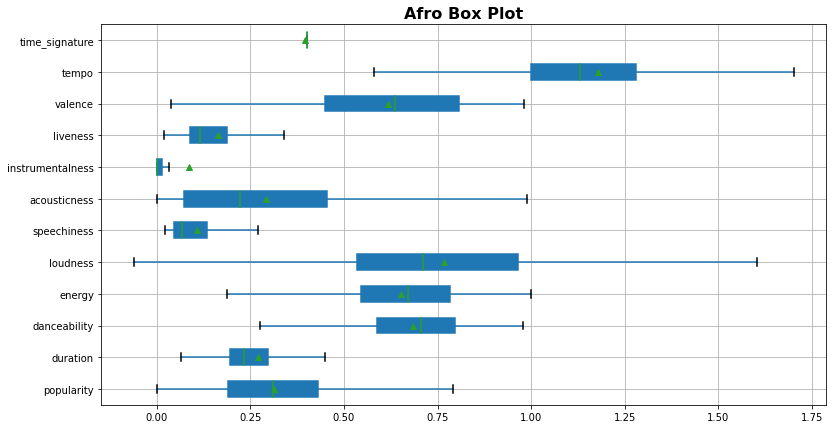

In [23]:
listas.loc[listas["playlist_category"]=="afro"].boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Afro Box Plot", fontsize=16, fontweight='heavy')
plt.show()